In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import cosine

## Testing edge detection on the raw images

In [2]:
classN_img_path = "Data/train/normal/n8 - Copy.jpg"
classA_img_path = "Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000000 (6).png"
classL_img_path = "Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000002.png"
classS_img_path = "Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000002 (4).png"

im_N = plt.imread(classN_img_path)
im_A = plt.imread(classA_img_path)
im_L = plt.imread(classL_img_path)
im_S = plt.imread(classS_img_path)

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def display_img_colorbar(img):
  # display the points
  fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
  im_ax = plt.imshow(img, cmap='gray')
  # create an axes on the right side of ax. The width of cax will be 5%
  # of ax and the padding between cax and ax will be fixed at 0.05 inch.
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im_ax, cax=cax)
  plt.show()

def plot_imgs(imN, imA, imL, imS):
    # display the points
    fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)
    ax[0][0].imshow(imN, cmap='gray')
    ax[0][0].set_title("Normal (N)")

    ax[0][1].imshow(imA, cmap='gray')
    ax[0][1].set_title("Adenocarcinoma (A)")

    ax[1][0].imshow(imL, cmap='gray')
    ax[1][0].set_title("Large cell carcinoma (L)")

    ax[1][1].imshow(imS, cmap='gray')
    ax[1][1].set_title("Squamous cell carcinoma (S)")
    plt.show()

In [26]:
def generate_edges(img):
    # extract the features from the image

    # convert to grayscale
    if np.max(img)>1:
        img = img.astype(np.float32)/255.0
    im_gray = np.mean(img, axis=2)

    # compute edges of the image
    sobelx = cv2.Sobel(im_gray, cv2.CV_32F, 1, 0, ksize=21) # Find x and y gradients
    sobely = cv2.Sobel(im_gray, cv2.CV_32F, 0, 1, ksize=21)
    magnitude = np.sqrt(sobelx**2.0 + sobely**2.0)
    magnitude = magnitude / np.max(magnitude) # normalize

    # threshold the image and get the interesting points
    im_threshold = cv2.Canny(image=(magnitude * 255).astype(np.uint8), threshold1=0, threshold2=100) # Canny Edge
    im_threshold = im_threshold / np.max(im_threshold) # normalize

    return magnitude, im_threshold

In [27]:
edgesN, canny_edgesN = generate_edges(im_N)
edgesA, canny_edgesA = generate_edges(im_A)
edgesL, canny_edgesL = generate_edges(im_L)
edgesS, canny_edgesS = generate_edges(im_S)

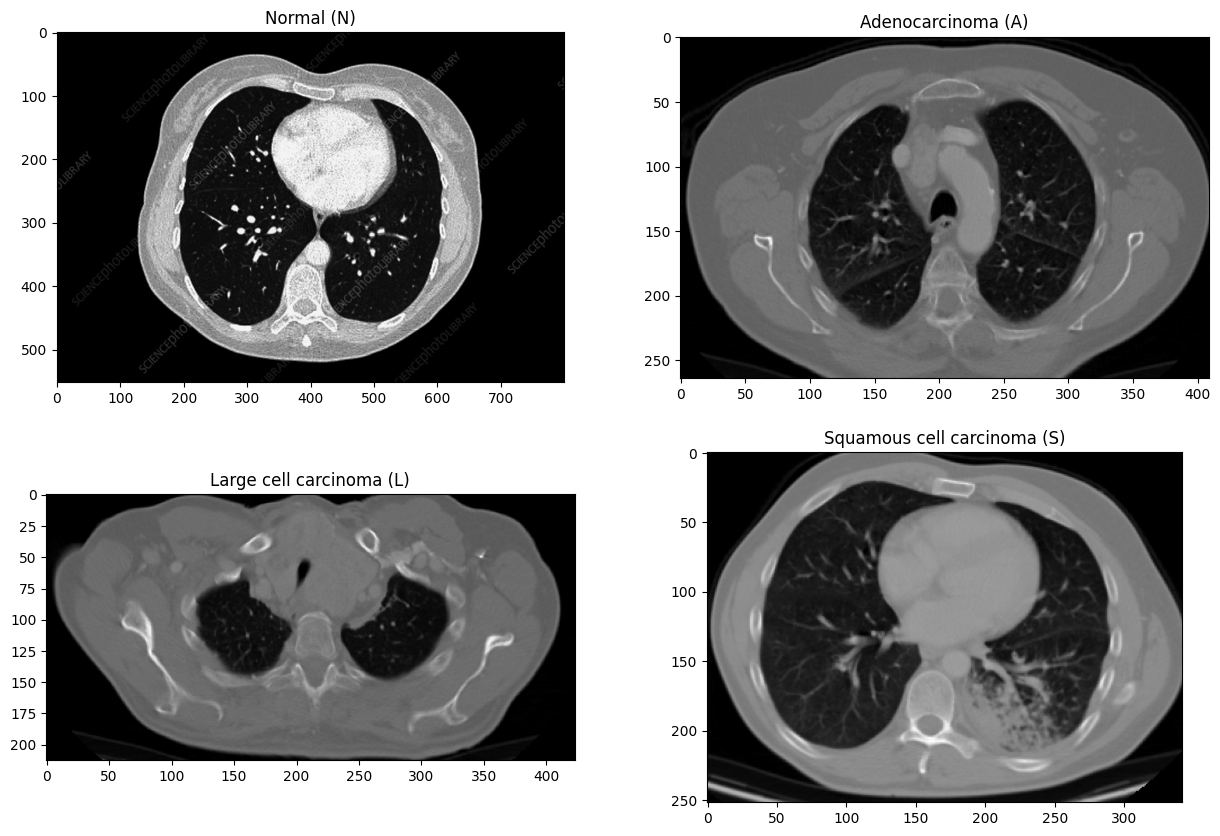

In [28]:
plot_imgs(im_N, im_A, im_L, im_S)

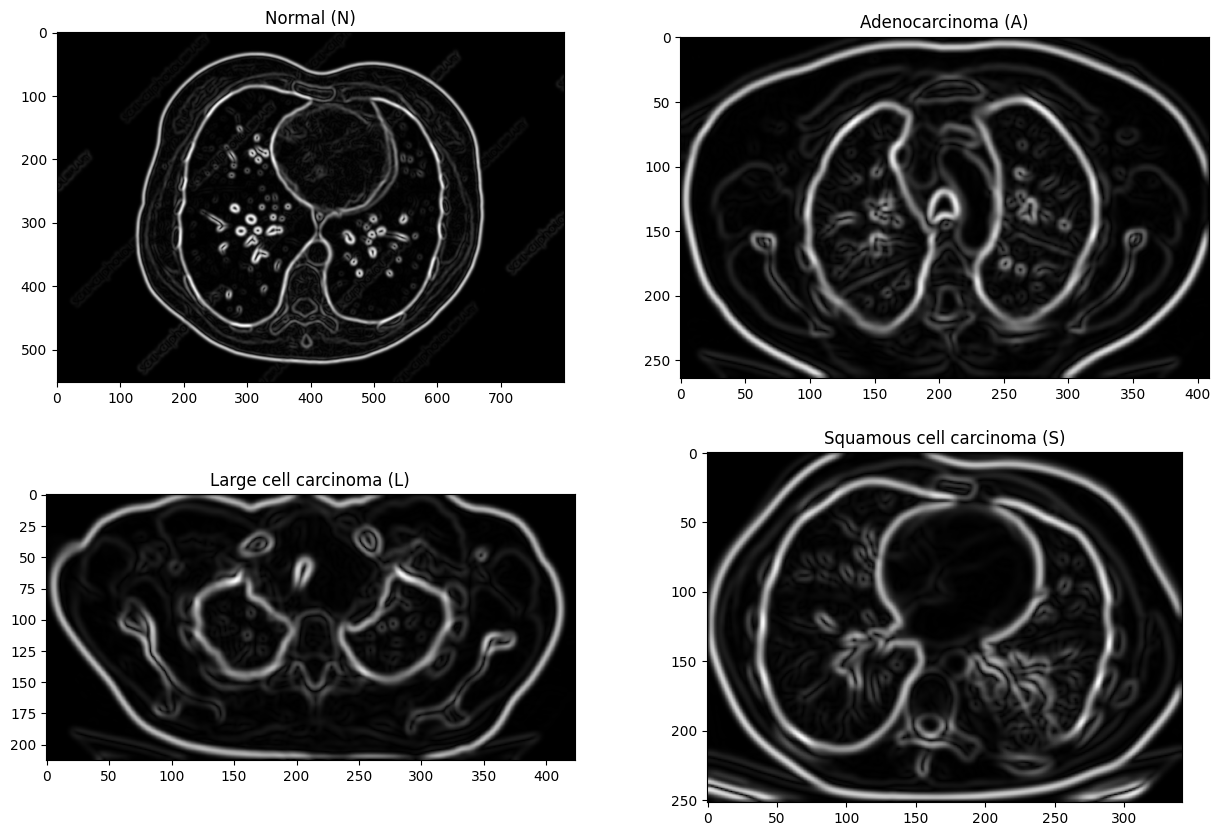

In [29]:
plot_imgs(edgesN, edgesA, edgesL, edgesS)

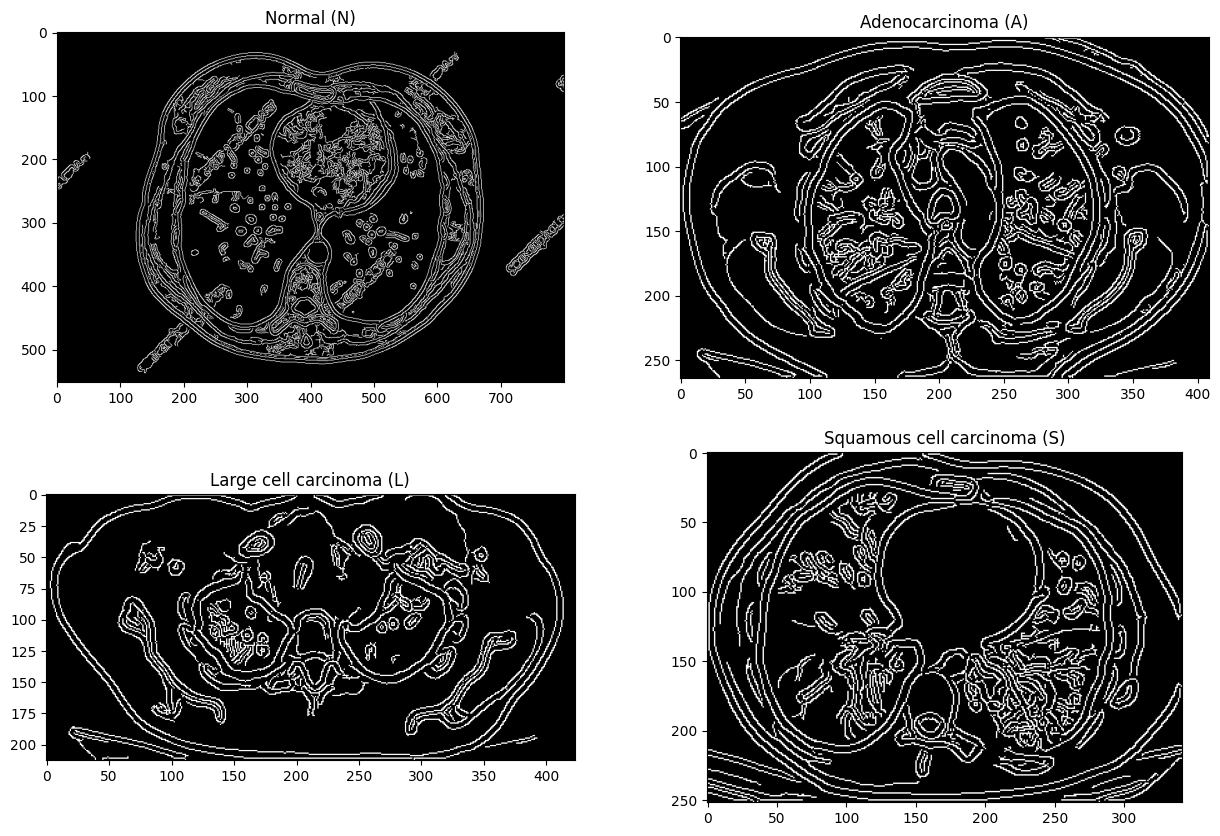

In [30]:
plot_imgs(canny_edgesN, canny_edgesA, canny_edgesL, canny_edgesS)